#### Code Evaluation
In this notebook, the performance of the implemented methods for a genetic algorithm that aims to solve the job sequencing problem will be evaluated and discussed.

In [1]:
from genetic import Job, ga_run, run_experiments
import pandas as pd
import matplotlib.pyplot as plt

Import success


In [2]:
df = pd.read_csv("resources/new_example.csv")
#df = pd.read_csv("resources/example_problems(p2).csv")

df.head

<bound method NDFrame.head of     a  3  10
0   b  2   5
1   c  5  10
2   d  1  10
3   e  3  30
4   f  1  20
5   g  2  10
6   h  4  25
7   i  2  15
8   j  3  35
9   k  1   5
10  l  4  40
11  m  2  20
12  n  3  15
13  o  5  50
14  p  1  30
15  q  2  12
16  r  4  22
17  s  3  18
18  t  1   8
19  u  5  45
20  v  2  28
21  w  3  33
22  x  4  12
23  y  1   7
24  z  2   9>

#### Dataset
The algorithm makes use of example datasets, which can be found under the folder "resources". A dataset is an example of a schedule, which lists all the available jobs the genetic algorithm can make use of to construct an optimal job sequence.

The datasets are stored in csv file format, where the order of a row can be defined as "job identifier", "job deadline" and "job profit".

Below is an implementation of the way the genetic algorithm should be used in code. Users can play around with the population size, generation count, mutation rate and the following underlying algorithmic methods:

**Selection method**
- Roulette wheel selection ("<code>roulette</code>")
- Tournament selection ("<code>tournament</code>")
- Elitism selection ("<code>elitism</code>")


**Crossover method**
- Order crossover ("<code>order</code>")
- Partially mapped crossover ("<code>pmx</code>")


**Mutation method**
- Swap mutation ("<code>swap</code>")
- Random reset mutation ("<code>random_reset</code>")

In [4]:
id_ = df.iloc[:,0]
deadline = df.iloc[:,1]
profit = df.iloc[:,2]

jobs = [Job(id_[i], deadline[i], profit[i]) for i in range(len(id_))]
max_profit, job_count, best_schedule = ga_run(
    jobs, 
    pop_size=100,
    generations=700, 
    mutation_rate=0.4,
    tournament_size=8,
    selection_method="roulette",
    crossover_method="order",
    mutation_method="random_reset")

print(f"\nNumber of jobs completed: {job_count}, Maximum profit: {max_profit}")

Initial Population of Chromosomes:
Chromosome 1: Schedule = [24, 21, 9, 18, 1, 16, 22, 8, 15, 4, 13, 0, 5, 12, 11, 2, 23, 6, 19, 20, 3, 14, 10, 17, 7]
Chromosome 2: Schedule = [21, 19, 13, 5, 22, 20, 6, 24, 7, 3, 0, 8, 12, 15, 9, 2, 4, 17, 23, 11, 1, 14, 18, 16, 10]
Chromosome 3: Schedule = [7, 18, 8, 23, 2, 5, 19, 3, 14, 21, 16, 13, 10, 12, 20, 15, 9, 4, 24, 17, 22, 11, 0, 6, 1]
Chromosome 4: Schedule = [21, 2, 1, 13, 11, 22, 4, 3, 16, 7, 19, 0, 24, 5, 18, 9, 8, 6, 12, 10, 15, 20, 23, 17, 14]
Chromosome 5: Schedule = [16, 3, 21, 23, 15, 7, 20, 17, 18, 11, 0, 14, 5, 8, 22, 6, 1, 13, 19, 24, 10, 4, 2, 9, 12]
Chromosome 6: Schedule = [5, 21, 14, 4, 7, 23, 19, 13, 17, 6, 18, 2, 20, 8, 1, 16, 0, 22, 10, 24, 3, 15, 9, 11, 12]
Chromosome 7: Schedule = [3, 7, 21, 14, 16, 22, 11, 13, 10, 5, 8, 17, 20, 0, 9, 2, 24, 19, 1, 23, 12, 4, 6, 15, 18]
Chromosome 8: Schedule = [24, 9, 20, 18, 15, 22, 10, 5, 13, 4, 3, 16, 6, 0, 2, 8, 7, 17, 14, 11, 23, 1, 21, 19, 12]
Chromosome 9: Schedule = [11, 24, 14,

In [5]:
print(f"\nNumber of jobs completed: {job_count}, Maximum profit: {max_profit}")
print(f"Genetic Algorithm Scheduled Jobs:\n {best_schedule}")


Number of jobs completed: 5, Maximum profit: 185
Genetic Algorithm Scheduled Jobs:
 ['u', 'v', 'l', 'r', 'o']


### Greedy Comparison
To judge the maximum profit output for the genetic algorithm, it will be compared to the output of a greedy algorithm. See the implementation of the algorithm below:

In [ ]:
def greedy(jobs):
    jobs.sort(key=lambda x: x.profit, reverse=True)
    max_deadline = max(job.deadline for job in jobs)
    time_slots = [-1] * max_deadline
    total_profit = 0
    completed_jobs = 0

    for job in jobs:
        for t in range(job.deadline - 1, -1, -1):
            if time_slots[t] == -1:
                time_slots[t] = job.id
                total_profit += job.profit
                completed_jobs += 1
                break

    print("Greedy Algorithm Scheduled Jobs:\n", time_slots)
    return completed_jobs, total_profit

In [ ]:
greedy_jobs, greedy_profit = greedy(jobs)
print(f"\nGreedy Algorithm:\n Jobs completed: {greedy_jobs}. Maximum profit: {greedy_profit}.")

Greedy Algorithm Scheduled Jobs:
 ['w', 'j', 'l', 'u', 'o']

Greedy Algorithm:
 Jobs completed: 5. Maximum profit: 203.


#### Plotting the results
To examine the convergence rate of different methods in combination with one another, the results from runs will be plotted in a graph. For each selection method, elitism, roulette wheel and tournament, 

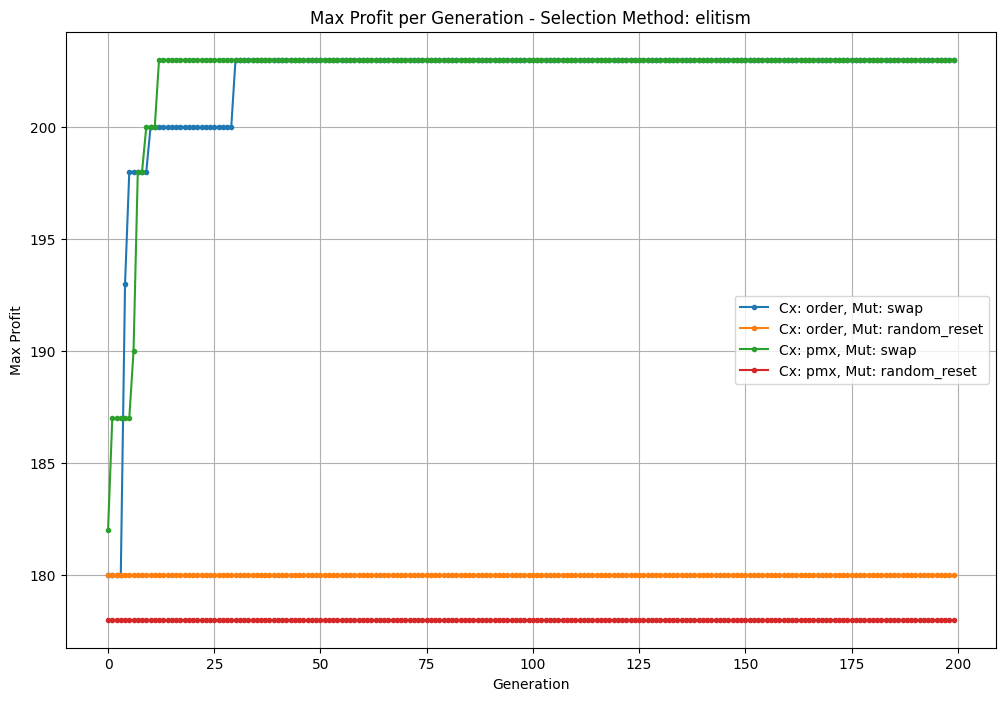

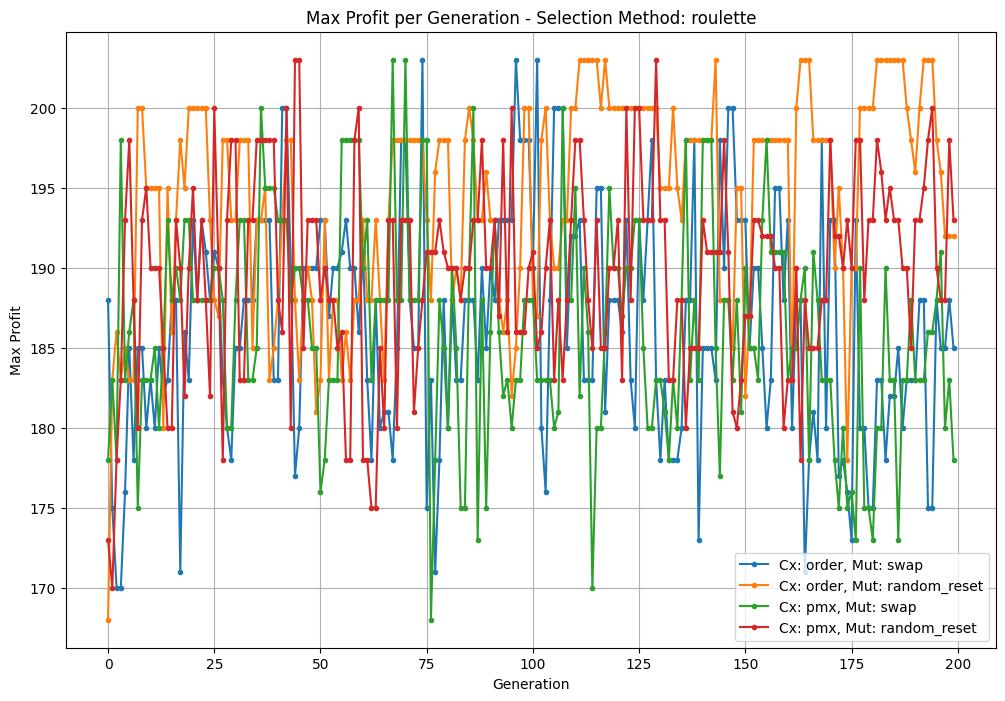

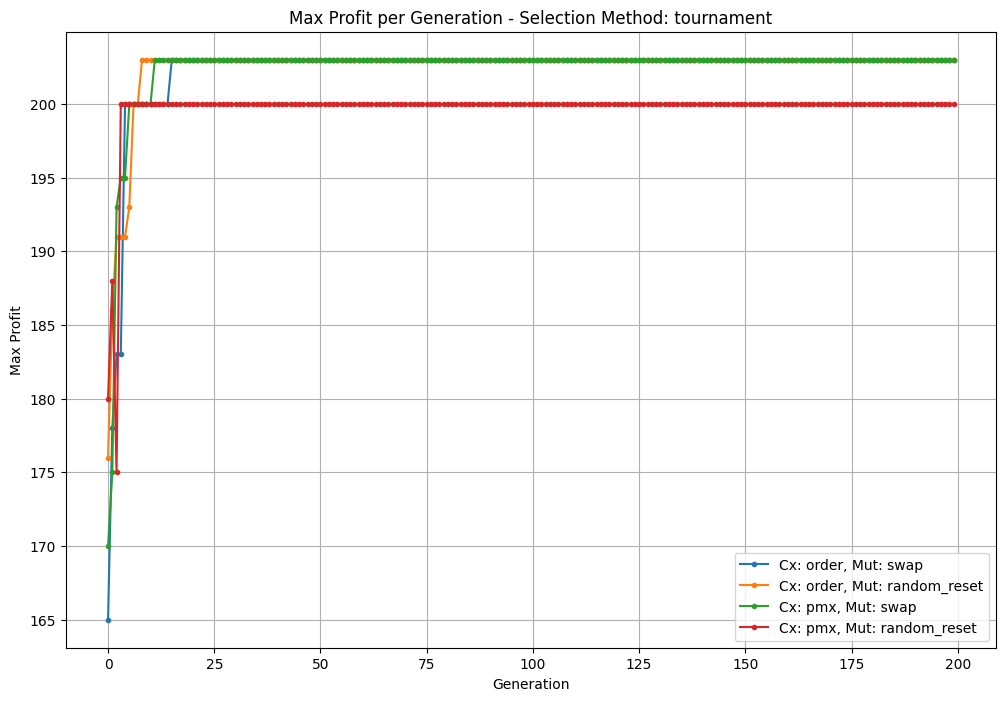

In [ ]:
def plot_results(results):
    selection_methods = set(key[0] for key in results.keys())  # Get unique selection methods

    for selection_method in selection_methods:
        plt.figure(figsize=(12, 8))
        
        for (sel_method, crossover_method, mutation_method), profits in results.items():
            if sel_method == selection_method:
                plt.plot(profits, label=f'Cx: {crossover_method}, Mut: {mutation_method}', marker='.')

        plt.title(f'Max Profit per Generation - Selection Method: {selection_method}')
        plt.xlabel('Generation')
        plt.ylabel('Max Profit')
        plt.legend()
        plt.grid()
        plt.show()

results = run_experiments(jobs, pop_size=100, generations=200, mutation_rate=0.35)

plot_results(results)